# 0. Setup Paths

In [10]:
import os

In [11]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' #modelo preentrenado de tensorflow zoo
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8' # nombre del modelo
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
#url para la descarga del modelo
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py' #nombre del script
LABEL_MAP_NAME = 'label_map.pbtxt' 

In [12]:
paths = { #utilizaremos este diccionario para la creacion de multiples folders con la finalidad de tener todo bien ordenado.
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'work'), #area de trabajo
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'), #folder de scripts
    'APIMODEL_PATH': os.path.join('Tensorflow','api_models'), #modelos del api
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'work','annotations'), #anotaciones
    'IMAGE_PATH': os.path.join('Tensorflow', 'work','imagenes'), #imagenes
    'MODEL_PATH': os.path.join('Tensorflow', 'work','models'), #modelos 
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'work','pre-trained-models'), #modelos preentrenados
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'work','models',CUSTOM_MODEL_NAME), #checkpoints o puntos de parada
    'OUTPUT_PATH': os.path.join('Tensorflow', 'work','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'work','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'work','models',CUSTOM_MODEL_NAME, 'tfliteexport'), #estos ultimos 3 son para implementacion web
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [13]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'work','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [14]:
for path in paths.values(): # we create a folder for each path.value
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [15]:
paths['OUTPUT_PATH'] #just to check how it's working

'Tensorflow/work/models/my_ssd_mobnet/export'

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
# https://www.tensorflow.org/install/source_windows

In [16]:
if os.name=='nt':
    !pip install wget
    import wget

In [17]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}
# We will clone everything in TensorFlow Model Garden

In [18]:
# Install Tensorflow Object Detection 
if os.name=='posix':  #linux, macOS
    !apt-get install protobuf-compiler
    !cd Tensorflow/api_models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 
#There's a lot of stuff here that we won't need but for now we'll just download it all
#Tensorflow_io is unavailable for M1 Macs

E: No se pudo abrir el fichero de bloqueo «/var/lib/dpkg/lock-frontend» - open (13: Permiso denegado)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
object_detection/protos/calibration.proto:41:3: Expected "required", "optional", or "repeated".
object_detection/protos/calibration.proto:41:6: Expected field name.
object_detection/protos/calibration.proto:53:3: Expected "required", "optional", or "repeated".
object_detection/protos/calibration.proto:53:6: Expected field name.


In [19]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-05-31 10:37:18.157275: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-31 10:37:18.198138: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/extras/CUPTI/lib64
2022-05-31 10:37:18.198159: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
Running tests under Python 3.8.13: /home/posgrado/Documentos/Proyecto_Aaron/Pistol_detection/tfod/bin/python
[

I0531 10:37:21.705843 139722502752000 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet EfficientNet backbone version: efficientnet-b0
I0531 10:37:21.705950 139722502752000 ssd_efficientnet_bifpn_feature_extractor.py:147] EfficientDet BiFPN num filters: 64
I0531 10:37:21.706005 139722502752000 ssd_efficientnet_bifpn_feature_extractor.py:148] EfficientDet BiFPN num iterations: 3
I0531 10:37:21.707805 139722502752000 efficientnet_model.py:143] round_filter input=32 output=32
I0531 10:37:21.720511 139722502752000 efficientnet_model.py:143] round_filter input=32 output=32
I0531 10:37:21.720587 139722502752000 efficientnet_model.py:143] round_filter input=16 output=16
I0531 10:37:21.764566 139722502752000 efficientnet_model.py:143] round_filter input=16 output=16
I0531 10:37:21.764672 139722502752000 efficientnet_model.py:143] round_filter input=24 output=24
I0531 10:37:21.886651 139722502752000 efficientnet_model.py:143] round_filter input=24 output=24
I0531 10:37:21.886775 139

I0531 10:37:24.591572 139722502752000 efficientnet_model.py:143] round_filter input=16 output=16
I0531 10:37:24.591675 139722502752000 efficientnet_model.py:143] round_filter input=24 output=24
I0531 10:37:24.773718 139722502752000 efficientnet_model.py:143] round_filter input=24 output=24
I0531 10:37:24.773818 139722502752000 efficientnet_model.py:143] round_filter input=40 output=48
I0531 10:37:24.961533 139722502752000 efficientnet_model.py:143] round_filter input=40 output=48
I0531 10:37:24.961646 139722502752000 efficientnet_model.py:143] round_filter input=80 output=88
I0531 10:37:25.206152 139722502752000 efficientnet_model.py:143] round_filter input=80 output=88
I0531 10:37:25.206281 139722502752000 efficientnet_model.py:143] round_filter input=112 output=120
I0531 10:37:25.465746 139722502752000 efficientnet_model.py:143] round_filter input=112 output=120
I0531 10:37:25.465894 139722502752000 efficientnet_model.py:143] round_filter input=192 output=208
I0531 10:37:25.791298 13

I0531 10:37:29.331070 139722502752000 efficientnet_model.py:143] round_filter input=112 output=160
I0531 10:37:29.331184 139722502752000 efficientnet_model.py:143] round_filter input=192 output=272
I0531 10:37:29.883247 139722502752000 efficientnet_model.py:143] round_filter input=192 output=272
I0531 10:37:29.883356 139722502752000 efficientnet_model.py:143] round_filter input=320 output=448
I0531 10:37:30.023830 139722502752000 efficientnet_model.py:143] round_filter input=1280 output=1792
I0531 10:37:30.054122 139722502752000 efficientnet_model.py:453] Building model efficientnet with params ModelConfig(width_coefficient=1.4, depth_coefficient=1.8, resolution=380, dropout_rate=0.4, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_rati

I0531 10:37:36.120416 139722502752000 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet EfficientNet backbone version: efficientnet-b7
I0531 10:37:36.120536 139722502752000 ssd_efficientnet_bifpn_feature_extractor.py:147] EfficientDet BiFPN num filters: 384
I0531 10:37:36.120608 139722502752000 ssd_efficientnet_bifpn_feature_extractor.py:148] EfficientDet BiFPN num iterations: 8
I0531 10:37:36.121801 139722502752000 efficientnet_model.py:143] round_filter input=32 output=64
I0531 10:37:36.136290 139722502752000 efficientnet_model.py:143] round_filter input=32 output=64
I0531 10:37:36.136436 139722502752000 efficientnet_model.py:143] round_filter input=16 output=32
I0531 10:37:36.351776 139722502752000 efficientnet_model.py:143] round_filter input=16 output=32
I0531 10:37:36.351886 139722502752000 efficientnet_model.py:143] round_filter input=24 output=48
I0531 10:37:36.790471 139722502752000 efficientnet_model.py:143] round_filter input=24 output=48
I0531 10:37:36.790585 13

In [20]:
import object_detection

In [13]:
!pip install tensorflow-gpu
!pip list

  Using cached tensorflow_gpu-2.9.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511.7 MB)
Package                       Version
----------------------------- -----------
absl-py                       1.0.0
apache-beam                   2.39.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.0.5
astunparse                    1.6.3
attrs                         21.4.0
avro-python3                  1.10.2
backcall                      0.2.0
beautifulsoup4                4.11.1
bleach                        5.0.0
cachetools                    5.2.0
certifi                       2022.5.18.1
cffi                          1.15.0
charset-normalizer            2.0.12
cloudpickle                   2.1.0
colorama                      0.4.4
contextlib2                   21.6.0
crcmod                        1.7
cycler                        0.11.0
Cython                        0.29.30
debugpy                       1.6.0
decorato

### Descargar nuestro modelo desde Tensorflow Model Zoo
Esto es con la finalidad de utilizar una arquitectura del estado del arte y utilizar la tecnica "transfer learning".
Vamos a utilizar la informacion que ya tiene este modelo (deteccion de personas, telefonos etc) y detectar objetos personalizados, en este caso: pistolas

In [21]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

#toda la informacion de este modelo preentrenado se encuentra en el folder pre-trained-models
# este modelo tiene como finalidad el ser rapido por lo que su presicion puede no ser muy buena

--2022-05-31 10:37:51--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolviendo download.tensorflow.org (download.tensorflow.org)... 142.250.68.80, 2607:f8b0:4007:811::2010
Conectando con download.tensorflow.org (download.tensorflow.org)[142.250.68.80]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 20515344 (20M) [application/x-tar]
Grabando a: “ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz”

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  7.05MB/s    in 2.8s    

2022-05-31 10:37:54 (7.05 MB/s) - “ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz” guardado [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x

# 2. Create Label Map

In [22]:
labels = [{'name':'pistol', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [23]:
# OPTIONAL IF RUNNING ON COLAB
# For macOS i had to download gnu-tar, the way you use it using gtar instead of tar
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar2.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

Pistol_detection/Tensorflow/work/imagenes/dataset_pistolas/pistol/train/
Pistol_detection/Tensorflow/work/imagenes/dataset_pistolas/pistol/train/armas (2).xml
Pistol_detection/Tensorflow/work/imagenes/dataset_pistolas/pistol/train/armas (34).jpg
Pistol_detection/Tensorflow/work/imagenes/dataset_pistolas/pistol/train/armas (34).xml
Pistol_detection/Tensorflow/work/imagenes/dataset_pistolas/pistol/train/armas (2).jpg
Pistol_detection/Tensorflow/work/imagenes/dataset_pistolas/pistol/train/armas (63).jpg
Pistol_detection/Tensorflow/work/imagenes/dataset_pistolas/pistol/train/armas (63).xml
Pistol_detection/Tensorflow/work/imagenes/dataset_pistolas/pistol/train/armas (75).jpg
Pistol_detection/Tensorflow/work/imagenes/dataset_pistolas/pistol/train/armas (75).xml
Pistol_detection/Tensorflow/work/imagenes/dataset_pistolas/pistol/train/armas (22).jpg
Pistol_detection/Tensorflow/work/imagenes/dataset_pistolas/pistol/train/armas (22).xml
Pistol_detection/Tensorflow/work/imagenes/dataset_pistolas/

In [24]:
if not os.path.exists(files['TF_RECORD_SCRIPT']): #convierte las anotaciones que tenemos a un formato que puede ser utilizado
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [25]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 
# creamos nuestros records de imagenes para test y para train

Successfully created the TFRecord file: Tensorflow/work/annotations/train.record
Successfully created the TFRecord file: Tensorflow/work/annotations/test.record


# 4. Copy Model Config to Training Folder

In [23]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [24]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [25]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [26]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [27]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [31]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [32]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [33]:
pipeline_config

model {
  ssd {
    num_classes: 1
    image_resizer {
      fixed_shape_resizer {
        height: 320
        width: 320
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v2_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 3.9999998989515007e-05
          }
        }
        initializer {
          random_normal_initializer {
            mean: 0.0
            stddev: 0.009999999776482582
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      use_depthwise: true
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
        additional_layer_depth: 128
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
 

# 6. Train the model

In [34]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [35]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [36]:
print(command)

python Tensorflow/api_models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/work/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/work/models/my_ssd_mobnet/pipeline.config --num_train_steps=2000


In [37]:
# This was done because there was an error when running the following cell
#!pip uninstall opencv-python-headless==4.5.5.64 -y
#!pip install opencv-python-headless==4.1.2.30 

Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Successfully uninstalled opencv-python-headless-4.5.5.64
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.4 MB/s 


In [37]:
!{command}

2022-05-31 10:38:57.150381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-31 10:38:57.155110: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/posgrado/Documentos/Proyecto_Aaron/Pistol_detection/tfod/lib/python3.8/site-packages/cv2/../../lib64::/usr/local/cuda/extras/CUPTI/lib64
2022-05-31 10:38:57.155127: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
202

Instructions for updating:
Use fn_output_signature instead
W0531 10:39:24.096028 140372323845888 deprecation.py:554] From /home/posgrado/Documentos/Proyecto_Aaron/Pistol_detection/tfod/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py:629: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Use fn_output_signature instead
INFO:tensorflow:Step 100 per-step time 0.845s
I0531 10:40:48.372639 140378394015488 model_lib_v2.py:705] Step 100 per-step time 0.845s
INFO:tensorflow:{'Loss/classification_loss': 0.5773613,
 'Loss/localization_loss': 0.5295212,
 'Loss/regularization_loss': 0.15498155,
 'Loss/total_loss': 1.2618641,
 'learning_rate': 0.0319994}
I0531 10:40:48.372874 140378394015488 model_lib_v2.py:708] {'Loss/classification_loss': 0.5773613,
 'Loss/localization_loss': 0.5295212,
 'Loss/regularization_loss': 0.15498155,
 'Loss/total_loss': 1.2618641,
 'learning_rate': 0.031999

INFO:tensorflow:Step 1500 per-step time 0.581s
I0531 10:54:29.926737 140378394015488 model_lib_v2.py:705] Step 1500 per-step time 0.581s
INFO:tensorflow:{'Loss/classification_loss': 0.12276001,
 'Loss/localization_loss': 0.115034185,
 'Loss/regularization_loss': 0.16296898,
 'Loss/total_loss': 0.40076318,
 'learning_rate': 0.07997945}
I0531 10:54:29.926937 140378394015488 model_lib_v2.py:708] {'Loss/classification_loss': 0.12276001,
 'Loss/localization_loss': 0.115034185,
 'Loss/regularization_loss': 0.16296898,
 'Loss/total_loss': 0.40076318,
 'learning_rate': 0.07997945}
INFO:tensorflow:Step 1600 per-step time 0.580s
I0531 10:55:27.900993 140378394015488 model_lib_v2.py:705] Step 1600 per-step time 0.580s
INFO:tensorflow:{'Loss/classification_loss': 0.18030477,
 'Loss/localization_loss': 0.0936547,
 'Loss/regularization_loss': 0.16279227,
 'Loss/total_loss': 0.43675172,
 'learning_rate': 0.079970405}
I0531 10:55:27.901191 140378394015488 model_lib_v2.py:708] {'Loss/classification_los

# 7. Evaluate the Model

In [38]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [39]:
print(command)

python Tensorflow/api_models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/work/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/work/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/work/models/my_ssd_mobnet


In [40]:
!{command}

2022-05-31 11:07:41.265760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-31 11:07:41.270571: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/posgrado/Documentos/Proyecto_Aaron/Pistol_detection/tfod/lib/python3.8/site-packages/cv2/../../lib64::/usr/local/cuda/extras/CUPTI/lib64
2022-05-31 11:07:41.270588: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
W05

INFO:tensorflow:Performing evaluation on 10 images.
I0531 11:08:03.612757 139960861964032 coco_evaluation.py:293] Performing evaluation on 10 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0531 11:08:03.612948 139960861964032 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0531 11:08:03.614652 139960861964032 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.068
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.147
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100

# 8. Load Train Model From Checkpoint

In [51]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [107]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-6')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [108]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [113]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [114]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'armas (95).jpg')

In [115]:
IMAGE_PATH

'Tensorflow/work/imagenes/test/armas (95).jpg'

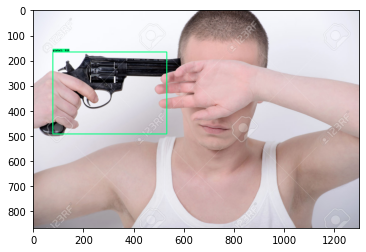

In [116]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

In [ ]:
!{command}

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')